In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rijalbib","key":"0e94587ff03379b22b83a558d3f306bc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d devansodariya/student-performance-data

Dataset URL: https://www.kaggle.com/datasets/devansodariya/student-performance-data
License(s): CC0-1.0
  0% 0.00/7.16k [00:00<?, ?B/s]
100% 7.16k/7.16k [00:00<00:00, 20.7MB/s]


In [ ]:
!mkdir student-performance-data
!unzip student-performance-data.zip -d student-performance-data
!ls student-performance-data

Archive:  student-performance-data.zip
  inflating: student-performance-data/student_data.csv  
student_data.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('student-performance-data/student_data.csv')

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

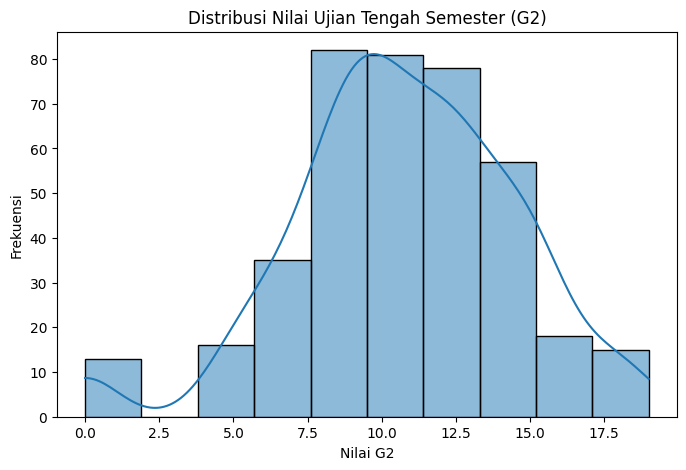

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['G2'], bins=10, kde=True)
plt.title('Distribusi Nilai Ujian Tengah Semester (G2)')
plt.xlabel('Nilai G2')
plt.ylabel('Frekuensi')
plt.show()

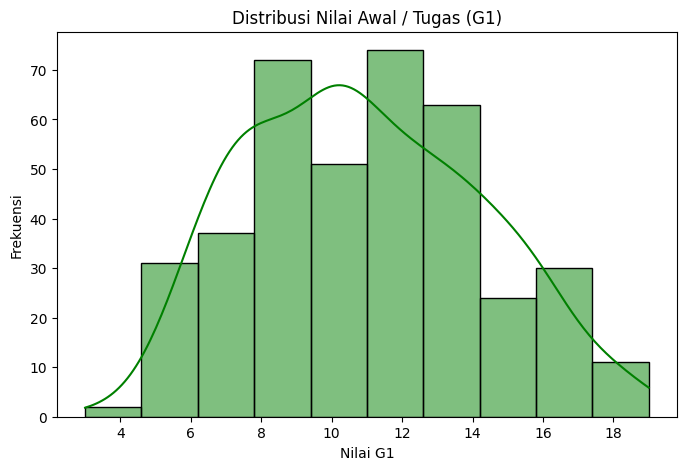

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['G1'], bins=10, kde=True, color='green')
plt.title('Distribusi Nilai Awal / Tugas (G1)')
plt.xlabel('Nilai G1')
plt.ylabel('Frekuensi')
plt.show()

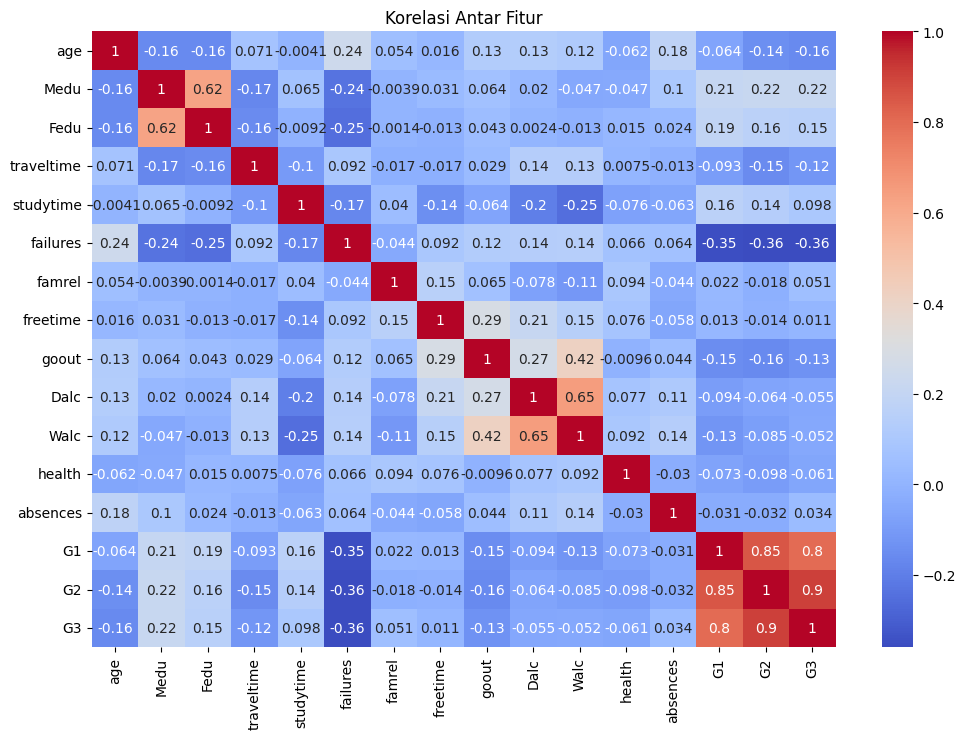

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

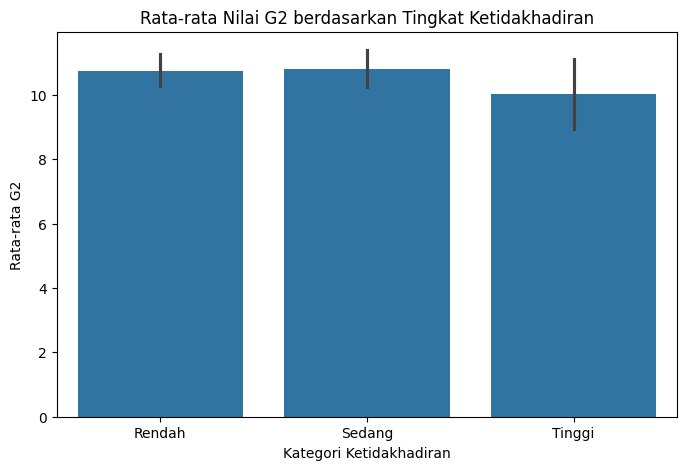

In [ ]:
df['Absence_Level'] = pd.cut(df['absences'],
                             bins=[-1, 5, 15, 100],
                             labels=['Rendah', 'Sedang', 'Tinggi'])

plt.figure(figsize=(8,5))
sns.barplot(x='Absence_Level', y='G2', data=df)
plt.title('Rata-rata Nilai G2 berdasarkan Tingkat Ketidakhadiran')
plt.xlabel('Kategori Ketidakhadiran')
plt.ylabel('Rata-rata G2')
plt.show()

<ipython-input-16-659116412>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Performance', data=df, palette='Set2')


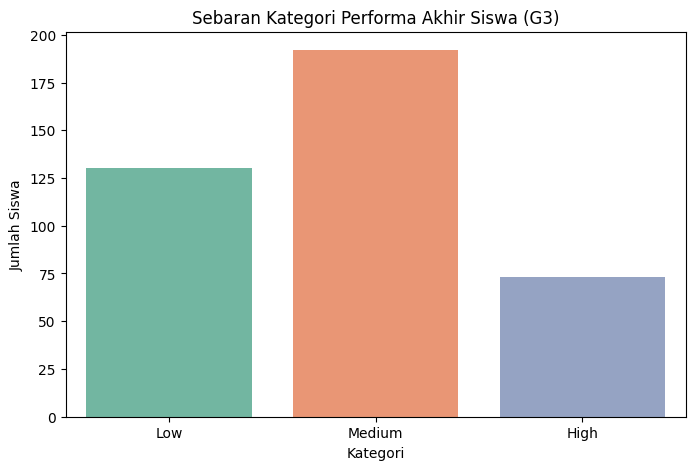

In [ ]:
def categorize_performance(score):
    if score >= 15:
        return 'High'
    elif score >= 10:
        return 'Medium'
    else:
        return 'Low'

df['Performance'] = df['G3'].apply(categorize_performance)

plt.figure(figsize=(8,5))
sns.countplot(x='Performance', data=df, palette='Set2')
plt.title('Sebaran Kategori Performa Akhir Siswa (G3)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Siswa')
plt.show()


<Axes: >

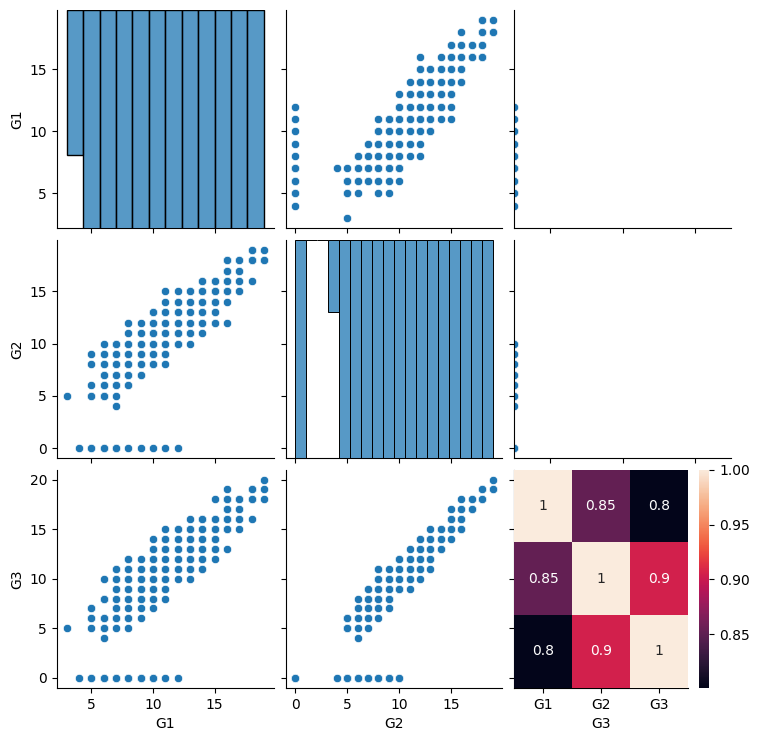

In [ ]:
sns.pairplot(df[[ 'G1', 'G2', 'G3']])  # Use actual column names
sns.heatmap(df[['G1', 'G2', 'G3']].corr(), annot=True) # Use actual column names

In [ ]:
df['Performance'] = df['G3'].apply(lambda x: 'High' if x >= 15 else 'Medium' if x >= 10 else 'Low')


In [ ]:
X = df[['G1', 'G2', 'studytime', 'failures', 'absences', 'Medu', 'Fedu', 'health']]
y = df['Performance']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df[['G1', 'G2', 'studytime', 'failures', 'absences', 'Medu', 'Fedu', 'health']]
X_columns = X.columns  # simpan nama kolom
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
selected_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'Medu', 'Fedu', 'health']
X = df[selected_features]
y = df['Performance']


In [ ]:
def kategorikan_performance(g3):
    if g3 < 10:
        return 'rendah'
    elif g3 < 15:
        return 'sedang'
    else:
        return 'tinggi'

df['Performance'] = df['G3'].apply(kategorikan_performance)


In [ ]:
y = df['Performance']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes:", le.classes_)

Classes: ['rendah' 'sedang' 'tinggi']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.utils import class_weight # Import the class_weight module

cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
cw_dict = dict(enumerate(cw))

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,755 (10.76 KB)

 Trainable params: 2,755 (10.76 KB)

 Non-trainable params: 0 (0.00 B)

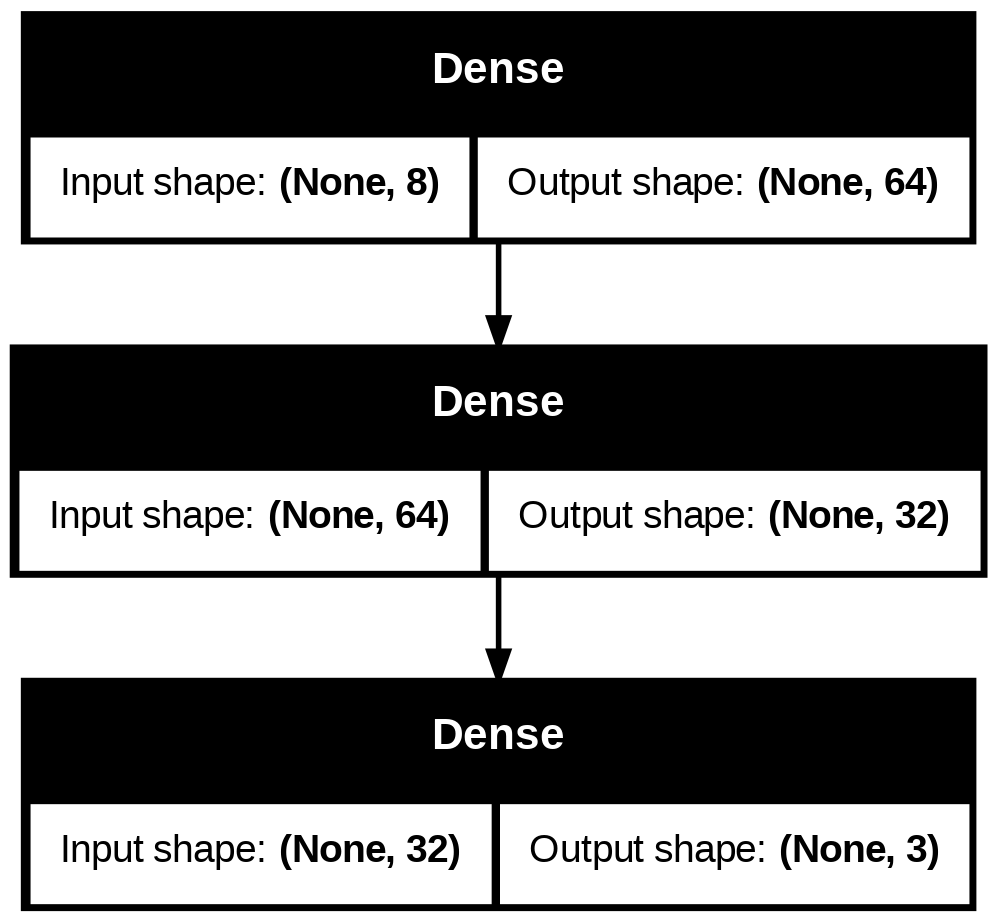

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, class_weight=cw_dict, verbose=0)

In [ ]:
y_test_encoded = label_encoder.transform(y_test)
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Student Performance Accuracy: {accuracy * 100:.2f}%")

Student Performance Accuracy: 83.54%


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1) # Use y_test_encoded instead of y_test
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8396 - loss: 0.3238
Akurasi Model: 0.8354
Loss Model: 0.3132


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

      rendah       0.78      0.93      0.85        27
      sedang       0.88      0.69      0.77        32
      tinggi       0.86      0.95      0.90        20

    accuracy                           0.84        79
   macro avg       0.84      0.85      0.84        79
weighted avg       0.84      0.84      0.83        79



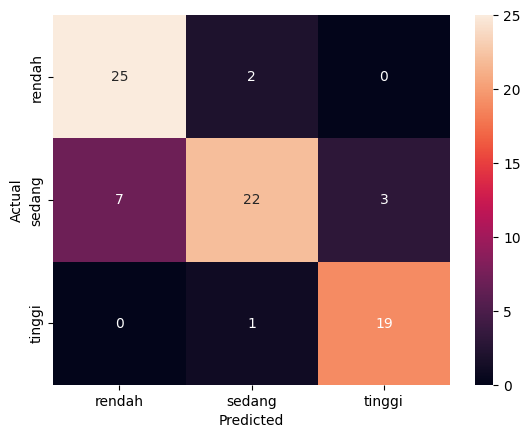

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


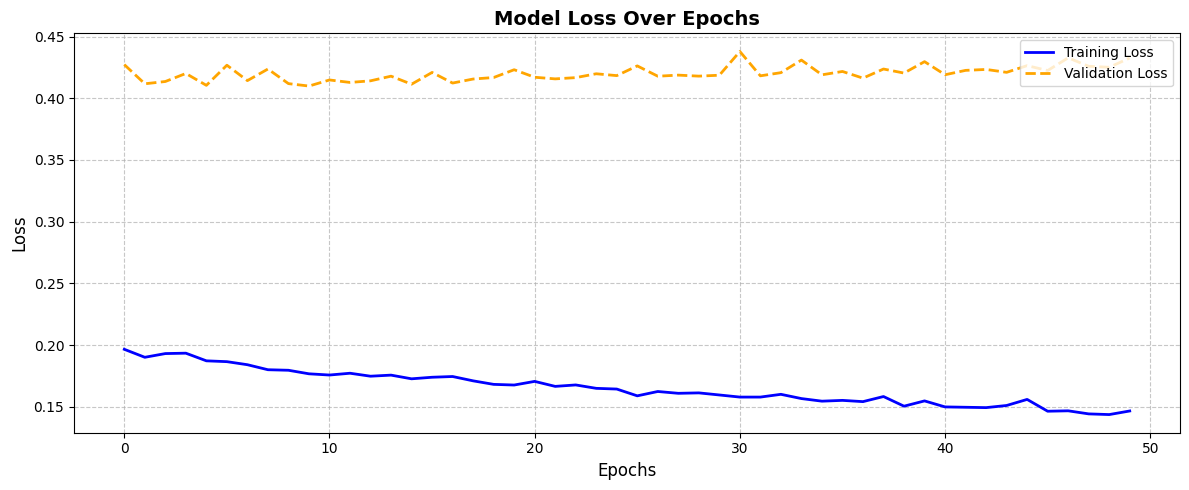

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history["loss"], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


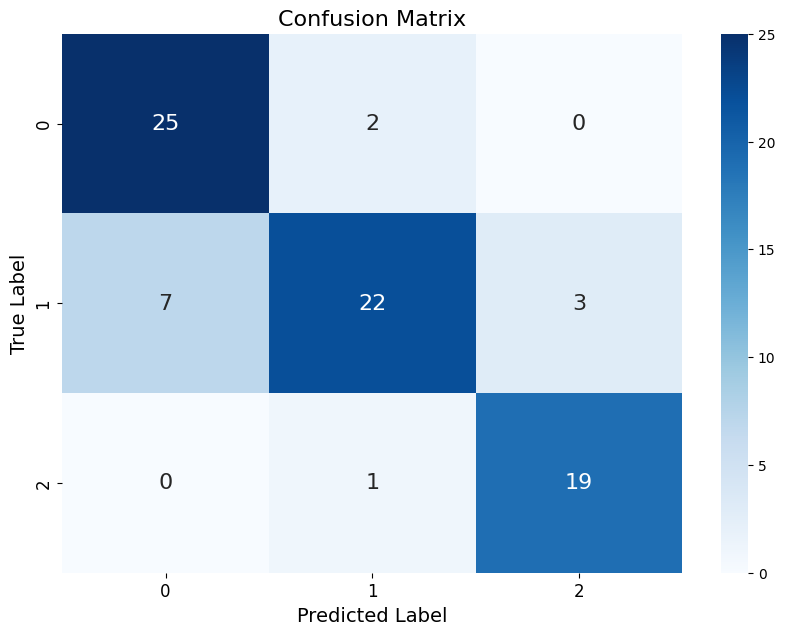

Classification Report:
              precision    recall  f1-score   support

      rendah       0.78      0.93      0.85        27
      sedang       0.88      0.69      0.77        32
      tinggi       0.86      0.95      0.90        20

    accuracy                           0.84        79
   macro avg       0.84      0.85      0.84        79
weighted avg       0.84      0.84      0.83        79



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # untuk model Keras (softmax output)

# Kembalikan ke label asli
y_pred_labels = le.inverse_transform(y_pred_classes)
y_test_labels = le.inverse_transform(y_test)

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred), target_names=le.classes_))

Classification Report:
              precision    recall  f1-score   support

      rendah       0.83      0.93      0.88        27
      sedang       0.82      0.84      0.83        32
      tinggi       1.00      0.80      0.89        20

    accuracy                           0.86        79
   macro avg       0.88      0.86      0.87        79
weighted avg       0.87      0.86      0.86        79



In [ ]:
sample_input_dict = {
    'school': ['GP'],
    'sex': ['F'],
    'age': [17],
    'address': ['U'],
    'famsize': ['GT3'],
    'Pstatus': ['A'],
    'Medu': [4],
    'Fedu': [4],
    'Mjob': ['teacher'],
    'Fjob': ['services'],
    'reason': ['course'],
    'guardian': ['mother'],
    'traveltime': [1],
    'studytime': [2],
    'failures': [0],
    'schoolsup': ['no'],
    'famsup': ['yes'],
    'paid': ['no'],
    'activities': ['yes'],
    'nursery': ['yes'],
    'higher': ['yes'],
    'internet': ['yes'],
    'romantic': ['no'],
    'famrel': [4],
    'freetime': [3],
    'goout': [2],
    'Dalc': [1],
    'Walc': [1],
    'health': [5],
    'absences': [4],
    'G1': [15],
    'G2': [14],
    'G3': [16]  # Harus dibuang!
}

sample_input_df = pd.DataFrame(sample_input_dict)


In [ ]:
sample_input_df = sample_input_df.drop(columns=['G3'])

In [ ]:
for col in sample_input_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    sample_input_df[col] = le.fit_transform(sample_input_df[col])

In [ ]:
features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'Medu', 'Fedu', 'health']

In [ ]:
sample_input_df = pd.DataFrame([{
    'G1': 15,
    'G2': 16,
    'studytime': 2,
    'failures': 0,
    'absences': 4,
    'Medu': 3,
    'Fedu': 3,
    'health': 4
}])
sample_input_df = sample_input_df[X_columns]
sample_input_scaled = scaler.transform(sample_input_df)



In [ ]:
le = LabelEncoder()
le.fit(df['Performance'])  # atau df['Performance'].values jika error
print("LabelEncoder Classes:", le.classes_)


LabelEncoder Classes: ['rendah' 'sedang' 'tinggi']


In [ ]:
sample_input_scaled = scaler.transform(sample_input_df[features]) # Use sample_input_df with features
prediction = model.predict(sample_input_scaled)
# The prediction output is a probability distribution over the classes.
# np.argmax finds the index of the class with the highest probability.
# le.inverse_transform converts the class index back to the original label.
predicted_label = le.inverse_transform(np.argmax(prediction, axis=1))


print("Prediksi Kategori Performance:", predicted_label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediksi Kategori Performance: tinggi


In [ ]:
# Convert ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan file
with open("student_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpybax8zns'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137381400919504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137381400919888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137381400918544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137381400917008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137381400919120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137381400914128: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']